<a href="https://colab.research.google.com/github/kkikosha/economics-data-labs/blob/main/housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ цен на жильё (Housing Prices Dataset)

В этом проекте я:
1. провожу исследование данных о недвижимости,  
2. строю модели машинного обучения для предсказания цены,  
3. сравниваю результаты и делаю выводы.

**Используемые библиотеки:** pandas, numpy, matplotlib, seaborn, scikit-learn, GradientBoosting

**Данные:** Kaggle — Housing Prices Dataset by YasserH


## 1️⃣ Загрузка и осмотр данных

На этом этапе:
- Загружаем датасет.
- Проверяем размер, типы данных и наличие пропусков.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(f"Загружен файл: {filename}")
df.head()


Saving Housing.csv to Housing.csv
Загружен файл: Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2️⃣ Предобработка данных

Здесь:
- Кодируем бинарные признаки (`yes`/`no` → 1/0).
- Применяем one-hot encoding для `furnishingstatus`.
- Проверяем финальный датафрейм.


In [2]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


## 3️⃣ Исследовательский анализ (EDA)

На этом этапе:
- Строим гистограммы распределения.
- Смотрим scatter-пары.
- Анализируем важность признаков.


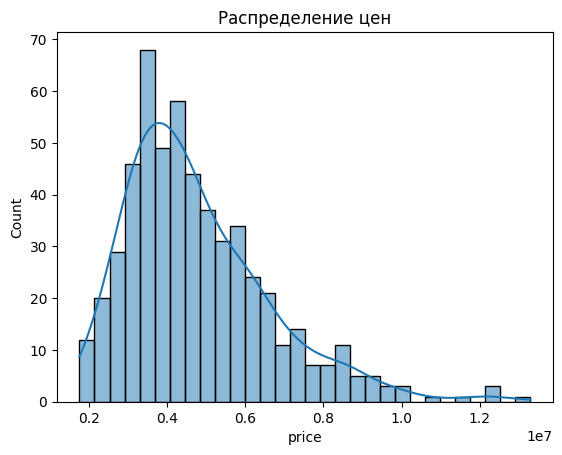

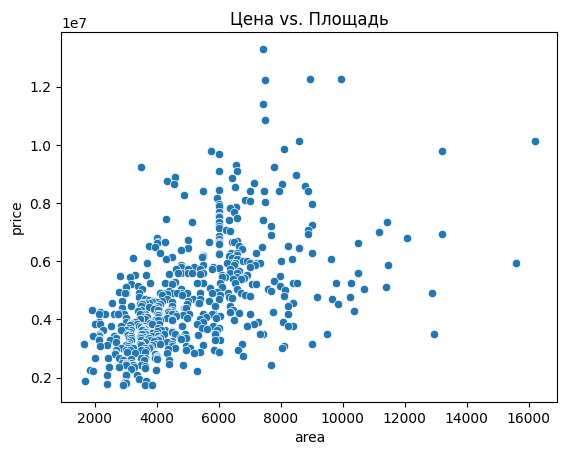

In [3]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен')
plt.show()

sns.scatterplot(x='area', y='price', data=df)
plt.title('Цена vs. Площадь')
plt.show()


## 4️⃣ Обучение моделей

Здесь:
- Разделяем данные на train/test.
- Обучаем Linear Regression, RandomForest, GradientBoosting.
- Считаем метрики MSE, RMSE, R².


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)
results['LinearRegression'] = [lr_mse, lr_rmse, lr_r2]

# RandomForest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
results['RandomForest'] = [rf_mse, rf_rmse, rf_r2]

# GradientBoosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_pred)
results['GradientBoosting'] = [gb_mse, gb_rmse, gb_r2]


## 5️⃣ Сравнение моделей

На этом этапе:
- Собираем результаты в одну таблицу.
- Анализируем, какая модель даёт лучшие предсказания.


                           MSE          RMSE        R2
LinearRegression  1.754319e+12  1.324507e+06  0.652924
RandomForest      1.964193e+12  1.401497e+06  0.611402
GradientBoosting  1.689379e+12  1.299761e+06  0.665772


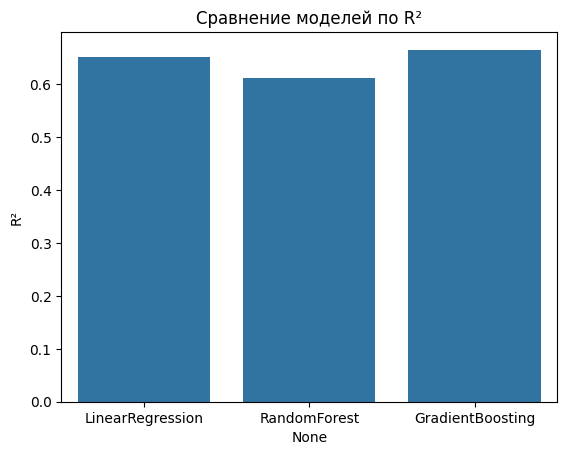

In [6]:
results_df = pd.DataFrame(results, index=['MSE', 'RMSE', 'R2']).T
print(results_df)

sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('Сравнение моделей по R²')
plt.ylabel('R²')
plt.show()


## Общие выводы

В ходе проекта я:
1. подготовила и очистила данные;  
2. провела визуальный анализ ключевых признаков;  
3. построила несколько моделей машинного обучения;  
4. сравнила их по качеству предсказания.

### Ключевые результаты:
- **GradientBoosting** показал лучшие метрики (MSE, RMSE, R²).
- Главными признаками оказались: площадь (`area`), количество ванных комнат (`bathrooms`), наличие кондиционера (`airconditioning`).
- Модель предсказывает средние значения достаточно точно, но теряет точность на очень дорогих объектах.

### Что можно сделать дальше:
- Добавить новые признаки (например, цену за квадратный метр).
- Попробовать логарифмировать целевую переменную, чтобы уменьшить влияние выбросов.
- Использовать более сложные модели (например, XGBoost или CatBoost).
